<h1>Daten und Programmbibliotheken laden</h1>

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format


dateipfad = "C:\\Users\\AMeinert\\Documents\\Python_Scripts\\projects\\MA\\data\\share\\"
datei = "data_full_gemeinden_ohne_outlier_mit_werthaltigen_spalten.csv"
#datei = "data_full.csv"

df_data = pd.read_csv(dateipfad + datei, header="infer", sep=";", encoding="ISO-8859-1")



In [2]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9571 entries, 0 to 9570
Columns: 242 entries, HH_1_1 to REGIONSTYP
dtypes: float64(217), int64(24), object(1)
memory usage: 17.7+ MB


In [64]:
collist = ["AGS_12", "RS_Land", "RS_RB_NUTS2", "RS_Kreis", "RS_VB", "RS_Gem", "Name", "Reg_Hier", "GEBIET", "GEMEINDENAME",
"PLZ", "GEO_MITTELP_LON", "GEO_MITTELP_LAT", "AGS_8", "DES", "GEN", "GF", "LENGTH", "RAU_RS", "RS_ALT",
           "Shape_Leng", "Shape__Area", "Shape__Length", "valid_geojson", "feature_type", "branch_list", "AGS_12_filled", "branch_list_cleaned"]




df_gemeinden = df_data[df_data["Reg_Hier"] == "Gemeinde"].copy()

df_extract = df_gemeinden[df_gemeinden["BEV_INSGESAMT"].between(374, 54318)].copy()

df_extract_mit_werthaltigen_spalten = df_extract.drop(columns=collist)

df_gemeinden.to_csv(dateipfad + "data_full_gemeinden.csv", sep=";", header=True, index=False, encoding="ISO-8859-1")

df_extract.to_csv(dateipfad + "data_full_gemeinden_ohne_outlier.csv", sep=";", header=True, index=False, encoding="ISO-8859-1")

df_extract_mit_werthaltigen_spalten.to_csv(dateipfad + "data_full_gemeinden_ohne_outlier_mit_werthaltigen_spalten.csv", sep=";", header=True, index=False, encoding="ISO-8859-1")

<h1>Korrelation zwischen den Inputvariabeln</h1>

In [ ]:
corr_matrix = df_data.corr(method="pearson")
corr_matrix.style.background_gradient(cmap="summer", low=0.8, high=1)


Die Korrelationsmatrix hat zu viele Dimensionen um eine Auswahl an Feature sinnvoll durchzuführen
Daher wird eine Vorauswahl der "geeignesten" Merkmale über eine Feaure Selection Verfahren (VarianceTreshold, K-Best) durchgeführt. Das dadurch verkleinerte Feature Set kann daraufhin dekorreliert werden


Beide Verfahren können nicht mit Nullwerten Arbeiten. Zunächst muss die Tabelle daher verdichtet werden

In [6]:
zielgroessen_liste = ["revenue_sum1", "revenue_sum2", "revenue_avg2", "revenue_avg1_per_head", "revenue_avg2_per_head"]

df_data_not_null = df_data.dropna().drop(columns=zielgroessen_liste)

In [4]:
len(df_data_not_null)

1818

In [66]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

df_variance_threshold = variance_threshold_selector(df_data_not_null, 0.9)

In [67]:
len(df_variance_threshold.columns)

237

Über die Varianz kann keine Eingrenzung von Features vorgenommen werden, da die Varianz für jedes Merkmal sehr hoch ist (Unterschiede im Regionstyp Gemeinde/Stadt.
Daher wird die SelectKBest Methode durchgeführt

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression


def k_best_selector(data, y_col, k=5):
    
    
    Y = data[y_col]
    
    data_columns = list(data.columns)
    data_columns.remove(y_col)
    
    X = data[data_columns]
    
    selector = SelectKBest(score_func=mutual_info_regression, k=k)
    #selector = SelectKBest(score_func=f_regression, k=k)

    
    selector.fit(X, Y)
    scores = pd.Series(index=data_columns, data=selector.scores_)
    print(scores.sort_values(ascending=False))
    
    return data[data.columns[selector.get_support(indices=True)]]





In [25]:
df_k_best = k_best_selector(df_data_not_null, "revenue_avg1", 40)


osm_nodes_counter                0.85
WHG_4_2                          0.72
GEB_4_2                          0.68
GEB_6_4                          0.65
WHG_7_5                          0.64
WHG_5_5                          0.59
WHG_1_2                          0.58
WHG_5_1                          0.58
WHG_8_1                          0.58
WHG_9_1                          0.58
WHG_3_1                          0.58
WHG_6_1                          0.58
WHG_7_1                          0.58
WHG_4_1                          0.58
WHG_1_3                          0.58
WHG_1_1                          0.58
HH_3_1                           0.58
HH_1_1                           0.58
HH_2_1                           0.58
HH_4_1                           0.58
DEM_3_29                         0.58
HH_4_4                           0.57
WHG_3_4                          0.56
HH_1_2                           0.56
HH_3_2                           0.56
HH_2_2                           0.56
DEM_3_1     

In [102]:
df_k_best

,HH_1_1,HH_2_1,HH_3_1,HH_4_1,HH_4_4,AEWZ,DEM_1_1,DEM_1_3,DEM_2_1,DEM_2_3,...,WHG_5_1,WHG_5_5,WHG_6_1,WHG_7_1,WHG_7_5,WHG_8_1,WHG_9_1,BEV_INSGESAMT,BEV_WEIBLICH,osm_nodes_counter
0,6059.00,6059.00,6059.00,6059.00,4088.00,12834,12834,6471,12834,6471,...,6594.00,4749.00,6594.00,6594.00,1069.00,6594.00,6594.00,13120,6607,254
1,10462.00,10462.00,10462.00,10462.00,7090.00,20768,20768,10981,20768,10981,...,11100.00,9344.00,11100.00,11100.00,1978.00,11100.00,11100.00,20886,10888,408
18,2651.00,2651.00,2651.00,2651.00,1667.00,5727,5727,3026,5727,3026,...,2909.00,2444.00,2909.00,2909.00,556.00,2909.00,2909.00,5825,3095,116
46,574.00,574.00,574.00,574.00,362.00,1400,1400,698,1400,698,...,603.00,530.00,603.00,603.00,84.00,603.00,603.00,1383,694,33
47,1508.00,1508.00,1508.00,1508.00,952.00,3533,3532,1825,3532,1825,...,1647.00,1512.00,1647.00,1647.00,243.00,1647.00,1647.00,3464,1764,172
55,3458.00,3458.00,3458.00,3458.00,2247.00,7261,7262,3762,7262,3762,...,3769.00,2945.00,3769.00,3769.00,686.00,3769.00,3769.00,7416,3809,234
63,3262.00,3262.00,3262.00,3262.00,1582.00,4797,4796,2592,4796,2592,...,4096.00,3239.00,4096.00,4096.00,621.00,4096.00,4096.00,4987,2681,371
70,13769.00,13769.00,13769.00,13769.00,9423.00,28755,28756,14910,28756,14910,...,14605.00,12209.00,14605.00,14605.00,2726.00,14605.00,14605.00,29228,15032,345
71,5147.00,5147.00,5147.00,5147.00,3405.00,11174,11174,5633,11174,5633,...,5608.00,4777.00,5608.00,5608.00,1120.00,5608.00,5608.00,11220,5654,146
72,9038.00,9038.00,9038.00,9038.00,5798.00,18398,18398,9729,18398,9729,...,9603.00,7676.00,9603.00,9603.00,1795.00,9603.00,9603.00,18487,9644,289


In [104]:
df_data_k_best_features = df_data[list(df_k_best.columns)]

In [ ]:
corr_matrix_k_best = df_data_k_best_features.corr(method="pearson")
corr_matrix_k_best.style.background_gradient(cmap="summer", low=0.8, high=1)

In [109]:
corr_matrix_k_best.describe()

,HH_1_1,HH_2_1,HH_3_1,HH_4_1,HH_4_4,AEWZ,DEM_1_1,DEM_1_3,DEM_2_1,DEM_2_3,...,WHG_5_1,WHG_5_5,WHG_6_1,WHG_7_1,WHG_7_5,WHG_8_1,WHG_9_1,BEV_INSGESAMT,BEV_WEIBLICH,osm_nodes_counter
count,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,...,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
mean,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,...,0.98,0.97,0.98,0.98,0.97,0.98,0.98,0.98,0.98,0.77
std,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
min,0.77,0.77,0.77,0.77,0.76,0.76,0.76,0.76,0.76,0.76,...,0.77,0.77,0.77,0.77,0.76,0.77,0.77,0.76,0.76,0.72
25%,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.98,0.97,0.98,0.98,0.98,0.98,0.98,0.99,0.99,0.76
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.99,0.98,0.99,0.99,0.98,0.99,0.99,1.00,1.00,0.76
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.98,1.00,1.00,0.98,1.00,1.00,1.00,1.00,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [131]:
corr_matrix = df_data.drop(columns=col_liste).corr(method="pearson")
corr_matrix_descr = corr_matrix.describe()
corr_matrix_descr

,HH_1_1,HH_1_2,HH_1_3,HH_1_4,HH_1_5,HH_2_1,HH_2_2,HH_2_3,HH_2_5,HH_2_6,...,ANTEIL_LANDWIRTSCHAFTSFLAECHE,ANTEIL_WALDFLAECHE,FLAECHE_QM,BEV_INSGESAMT,BEV_MAENNLICH,BEV_WEIBLICH,BEV_JE_QM,branch_counter,osm_nodes_counter,branch_counter_cleaned
count,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,...,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
mean,0.90,0.87,0.90,0.90,0.89,0.90,0.87,0.90,0.87,0.89,...,-0.07,-0.04,0.45,0.91,0.91,0.91,0.48,0.53,0.69,0.52
std,0.20,0.19,0.19,0.20,0.19,0.20,0.19,0.20,0.19,0.19,...,0.10,0.10,0.13,0.20,0.20,0.20,0.12,0.14,0.15,0.13
min,-0.13,-0.13,-0.13,-0.11,-0.12,-0.13,-0.13,-0.12,-0.14,-0.12,...,-0.95,-0.95,-0.14,-0.12,-0.12,-0.12,-0.16,-0.11,-0.14,-0.11
25%,0.89,0.85,0.88,0.91,0.87,0.89,0.85,0.91,0.86,0.87,...,-0.08,-0.04,0.46,0.90,0.90,0.90,0.48,0.51,0.69,0.50
50%,0.98,0.95,0.96,0.96,0.97,0.98,0.95,0.98,0.94,0.96,...,-0.07,-0.04,0.48,0.98,0.98,0.98,0.52,0.57,0.75,0.57
75%,0.99,0.97,0.99,0.98,0.98,0.99,0.97,0.99,0.97,0.98,...,-0.06,-0.03,0.50,0.99,0.99,0.99,0.54,0.59,0.76,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [16]:

def select_feature_by_corr(data, corr_min, corr_max):
    
    
    corr_matrix = data.corr(method="pearson")
    corr_matrix_descr = corr_matrix.describe()
        
    feature_list = []
    
    for feature in list(corr_matrix_descr.columns):

        mean_corr_of_feat = corr_matrix_descr[feature]["mean"]

        if( corr_min < mean_corr_of_feat < corr_max):
            
            feature_list.append({feature: round(mean_corr_of_feat, 2)})

    return feature_list




In [152]:
select_feature_by_corr(df_data.drop(columns=col_liste), -0.7, 0.7)

[{'REL_1_2': 0.68},
 {'GEB_2_2': 0.68},
 {'GEB_3_2': 0.68},
 {'GEB_5_6': 0.66},
 {'WHG_3_2': 0.65},
 {'WHG_5_6': 0.68},
 {'WHG_6_5': 0.69},
 {'WHG_9_5': 0.69},
 {'EINK_JE_EINW': 0.12},
 {'ANTEIL_ARBEITSLOSE': -0.04},
 {'ANTEIL_ARBEITSLOSE_ALTER_15_24': -0.1},
 {'ANTEIL_ARBEITSLOSE_ALTER_55_64': -0.08},
 {'ANTEIL_LANGZEITARBEITSLOSE': 0.17},
 {'ANTEIL_ARBEITSLOSE_AUSLAENDER': 0.26},
 {'ANTEIL_SIEDLUNG_VERKEHR': 0.39},
 {'ANTEIL_ERHOLUNGSFLAECHE': 0.15},
 {'ANTEIL_LANDWIRTSCHAFTSFLAECHE': -0.07},
 {'ANTEIL_WALDFLAECHE': -0.04},
 {'FLAECHE_QM': 0.45},
 {'BEV_JE_QM': 0.48},
 {'branch_counter': 0.53},
 {'osm_nodes_counter': 0.69},
 {'branch_counter_cleaned': 0.52}]

In [3]:
selected_features = ["DEM_3_29", "GEB_6_4", "DEM_2_4", "HH_4_4", "WHG_4_2", "osm_nodes_counter", "BEV_INSGESAMT", "BEV_JE_QM", 
        "FLAECHE_QM", "ANTEIL_ARBEITSLOSE", "ANTEIL_ARBEITSLOSE_ALTER_15_24", "ANTEIL_SIEDLUNG_VERKEHR", "EINK_JE_EINW", "WHG_6_5",
                    "BESIEDLUNGSSCHLUESSEL", "REGIONSTYP"]

len(selected_features)

In [10]:
zielgroessen_liste.append("revenue_avg1")
selected_features + zielgroessen_liste

['DEM_3_29',
 'GEB_6_4',
 'DEM_2_4',
 'HH_4_4',
 'WHG_4_2',
 'osm_nodes_counter',
 'BEV_INSGESAMT',
 'BEV_JE_QM',
 'FLAECHE_QM',
 'ANTEIL_ARBEITSLOSE',
 'ANTEIL_ARBEITSLOSE_ALTER_15_24',
 'ANTEIL_SIEDLUNG_VERKEHR',
 'EINK_JE_EINW',
 'WHG_6_5',
 'BESIEDLUNGSSCHLUESSEL',
 'REGIONSTYP',
 'revenue_sum1',
 'revenue_sum2',
 'revenue_avg2',
 'revenue_avg1_per_head',
 'revenue_avg2_per_head',
 'revenue_avg1']

In [8]:
df_data[selected_features + zielgroessen_liste].corr()

,DEM_3_29,GEB_6_4,DEM_2_4,HH_4_4,WHG_4_2,osm_nodes_counter,BEV_INSGESAMT,BEV_JE_QM,FLAECHE_QM,ANTEIL_ARBEITSLOSE,ANTEIL_ARBEITSLOSE_ALTER_15_24,ANTEIL_SIEDLUNG_VERKEHR,EINK_JE_EINW,WHG_6_5,BESIEDLUNGSSCHLUESSEL,revenue_sum1,revenue_sum2,revenue_avg2,revenue_avg1_per_head,revenue_avg2_per_head
DEM_3_29,1.00,0.95,0.97,0.98,0.88,0.77,0.98,0.52,0.47,-0.02,-0.13,0.41,0.11,0.79,-0.44,0.76,0.76,0.78,-0.36,-0.36
GEB_6_4,0.95,1.00,0.93,0.95,0.89,0.75,0.94,0.53,0.39,-0.02,-0.15,0.40,0.12,0.79,-0.44,0.77,0.77,0.79,-0.26,-0.26
DEM_2_4,0.97,0.93,1.00,0.99,0.89,0.76,1.00,0.53,0.49,-0.06,-0.11,0.42,0.14,0.75,-0.45,0.78,0.78,0.78,-0.40,-0.40
HH_4_4,0.98,0.95,0.99,1.00,0.90,0.76,1.00,0.55,0.47,-0.02,-0.12,0.42,0.12,0.78,-0.45,0.78,0.78,0.79,-0.39,-0.39
WHG_4_2,0.88,0.89,0.89,0.90,1.00,0.72,0.89,0.61,0.28,-0.10,-0.15,0.42,0.21,0.63,-0.46,0.75,0.75,0.81,-0.18,-0.18
osm_nodes_counter,0.77,0.75,0.76,0.76,0.72,1.00,0.76,0.39,0.44,-0.05,-0.13,0.29,0.13,0.60,-0.33,0.68,0.68,0.85,0.17,0.17
BEV_INSGESAMT,0.98,0.94,1.00,1.00,0.89,0.76,1.00,0.54,0.49,-0.04,-0.12,0.43,0.13,0.76,-0.46,0.77,0.77,0.78,-0.41,-0.41
BEV_JE_QM,0.52,0.53,0.53,0.55,0.61,0.39,0.54,1.00,-0.12,-0.16,-0.14,0.51,0.31,0.35,-0.66,0.42,0.42,0.52,0.08,0.08
FLAECHE_QM,0.47,0.39,0.49,0.47,0.28,0.44,0.49,-0.12,1.00,0.15,-0.08,-0.05,-0.14,0.44,0.10,0.12,0.12,0.09,-0.34,-0.34
ANTEIL_ARBEITSLOSE,-0.02,-0.02,-0.06,-0.02,-0.10,-0.05,-0.04,-0.16,0.15,1.00,-0.24,-0.28,-0.74,0.13,0.25,-0.02,-0.02,-0.09,-0.17,-0.17


In [11]:
df_data[selected_features + zielgroessen_liste].to_csv(dateipfad + "selected_features.csv", sep=";", header=True, index=False, encoding="ISO-8859-1")

<h3> Gibt es ein anderes Ergebnis wenn ich die Merkmale transformiere? Mermal pro Quadratkilometer Fläche einer Region! </h3>

In [9]:
except_cols = ["ANTEIL_ARBEITSLOSE", "ANTEIL_ARBEITSLOSE_ALTER_15_24", "ANTEIL_ARBEITSLOSE_ALTER_55_64", 
                 "ANTEIL_LANGZEITARBEITSLOSE", "ANTEIL_ARBEITSLOSE_AUSLAENDER", "ANTEIL_SIEDLUNG_VERKEHR", 
                 "ANTEIL_ERHOLUNGSFLAECHE", "ANTEIL_LANDWIRTSCHAFTSFLAECHE", "ANTEIL_WALDFLAECHE", "FLAECHE_QM", "BEV_JE_QM"]

df_data_relative = df_data.copy()

for col in df_data_relative.columns:
    
    if(col not in except_cols):
        
        df_data_relative[col] = df_data_relative[col] / df_data_relative["FLAECHE_QM"]

In [11]:
df_data_relative["BEV_INSGESAMT"]

0       201.10
1       653.30
2        66.04
3        73.95
4       377.29
5        95.44
6       148.43
7        61.06
8        49.62
9       226.01
10       57.39
11      157.70
12       55.02
13      101.21
14       45.96
15       82.69
16       28.71
17       30.92
18     1206.00
19       59.56
20       36.20
21       45.27
22       81.20
23       32.91
24       87.73
25       32.71
26      129.40
27       57.06
28       73.49
29      350.75
         ...  
9541    115.72
9542     94.88
9543    766.93
9544    314.55
9545    210.60
9546    127.50
9547    285.62
9548     70.18
9549     52.92
9550     77.10
9551     51.05
9552     52.23
9553     80.47
9554     96.49
9555    171.88
9556    302.91
9557    129.20
9558    101.21
9559     85.11
9560    166.28
9561     85.34
9562    241.11
9563     48.63
9564     50.69
9565     64.79
9566     93.41
9567     83.75
9568     62.50
9569    267.24
9570     98.83
Name: BEV_INSGESAMT, Length: 9571, dtype: float64

In [ ]:
corr_matrix_relative = df_data_relative.corr(method="pearson")
corr_matrix_relative.style.background_gradient(cmap="summer", low=0.8, high=1)

In [17]:
df_data_relative_not_null = df_data_relative.dropna().drop(columns=col_liste)

In [18]:
df_relative_k_best = k_best_selector(df_data_relative_not_null, "revenue_avg1", 40)

HH_4_3                           7000.68
FAM_2_1                          6480.63
FAM_3_1                          6480.63
FAM_1_1                          6480.63
DEM_2_6                          6395.92
HH_2_3                           6295.35
FAM_2_2                          6295.35
HH_4_1                           6290.18
HH_3_1                           6290.18
HH_1_1                           6290.18
HH_2_1                           6290.18
DEM_4_5                          6255.94
DEM_3_3                          6255.63
DEM_2_3                          6255.63
DEM_4_3                          6255.63
DEM_1_3                          6255.63
HH_1_4                           6236.99
FAM_1_3                          6236.99
DEM_4_1                          6232.71
DEM_2_1                          6232.71
DEM_5_1                          6232.71
DEM_1_1                          6232.71
DEM_6_1                          6232.71
REL_1_1                          6232.71
DEM_3_1         

In [20]:
select_feature_by_corr(df_data_relative.drop(columns=col_liste), -0.7, 0.7)

[{'DEM_6_7': 0.7},
 {'REL_1_2': 0.67},
 {'GEB_2_2': 0.51},
 {'GEB_2_3': 0.61},
 {'GEB_2_9': 0.7},
 {'GEB_2_10': 0.68},
 {'GEB_3_2': 0.51},
 {'GEB_3_3': 0.61},
 {'GEB_3_8': 0.67},
 {'GEB_3_9': 0.67},
 {'GEB_3_10': 0.66},
 {'GEB_5_6': 0.56},
 {'WHG_3_2': 0.49},
 {'WHG_3_3': 0.62},
 {'WHG_5_6': 0.6},
 {'WHG_6_5': 0.65},
 {'WHG_7_11': 0.66},
 {'WHG_9_5': 0.63},
 {'EINK_JE_EINW': 0.23},
 {'ANTEIL_ARBEITSLOSE': -0.14},
 {'ANTEIL_ARBEITSLOSE_ALTER_15_24': -0.12},
 {'ANTEIL_ARBEITSLOSE_ALTER_55_64': -0.03},
 {'ANTEIL_LANGZEITARBEITSLOSE': 0.09},
 {'ANTEIL_ARBEITSLOSE_AUSLAENDER': 0.37},
 {'ANTEIL_SIEDLUNG_VERKEHR': 0.46},
 {'ANTEIL_ERHOLUNGSFLAECHE': 0.23},
 {'ANTEIL_LANDWIRTSCHAFTSFLAECHE': -0.15},
 {'ANTEIL_WALDFLAECHE': 0.03},
 {'FLAECHE_QM': -0.12},
 {'branch_counter': 0.54},
 {'osm_nodes_counter': 0.64},
 {'branch_counter_cleaned': 0.54}]

In [7]:
df_to_predict = df_extract[df_extract["revenue_avg1"].isnull()].copy()
df_labeled = df_extract[~df_extract["revenue_avg1"].isnull()].copy()

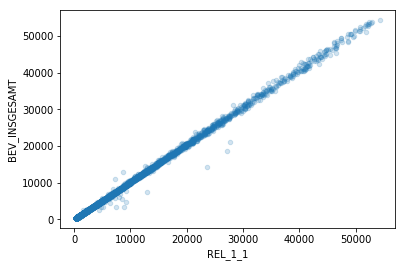

In [15]:
df_data.plot(kind = "scatter", x="REL_1_1", y="BEV_INSGESAMT", alpha=0.2)

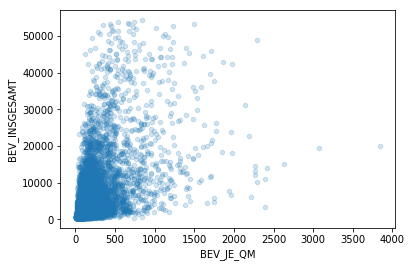

In [14]:
df_data.plot(kind = "scatter", x="BEV_JE_QM", y="BEV_INSGESAMT", alpha=0.2)

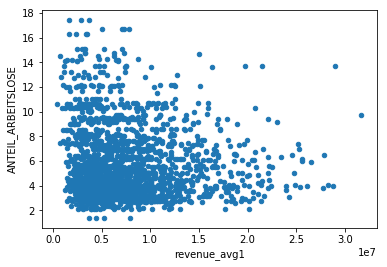

In [42]:
df_labeled.plot(kind = "scatter", x="revenue_avg1", y="ANTEIL_ARBEITSLOSE")

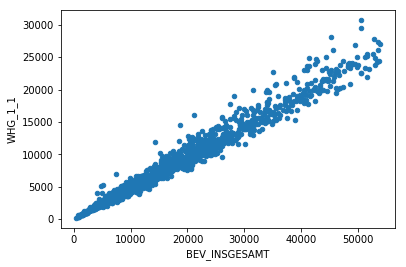

In [118]:
df_labeled.plot(kind = "scatter", x="BEV_INSGESAMT", y="WHG_1_1")

In [141]:
df_corr = df_extract.corr()["EINK_JE_EINW"]

df_corr.sort_values()

ANTEIL_ARBEITSLOSE              -0.74
RS_Land                         -0.45
AGS_12                          -0.44
RAU_RS                          -0.44
RS_ALT                          -0.44
AGS_12_filled                   -0.44
AGS_8                           -0.44
BESIEDLUNGSSCHLUESSEL           -0.34
ANTEIL_LANDWIRTSCHAFTSFLAECHE   -0.29
ANTEIL_LANGZEITARBEITSLOSE      -0.25
Shape__Area                     -0.16
Shape__Length                   -0.15
FLAECHE_QM                      -0.14
WHG_3_2                         -0.13
GEB_3_2                         -0.13
GEB_2_2                         -0.13
Shape_Leng                      -0.12
LENGTH                          -0.12
RS_VB                           -0.12
RS_Gem                          -0.11
WHG_3_3                         -0.10
GEB_3_3                         -0.10
GEB_2_3                         -0.10
WHG_6_5                         -0.06
RS_Kreis                        -0.05
REL_1_4                         -0.04
WHG_7_3     

In [212]:
bev_corr = df_extract.corr()["BEV_INSGESAMT"]

bev_highest_corr_feat = bev_corr[bev_corr.between(0.9, 1)]

bev_highest_corr_feat_set = set(bev_highest_corr_feat.index)

#reduced_feat_set = set(df_extract.columns) - bev_highest_corr_feat_set

In [213]:
s = set(bev_highest_corr_feat.index)
ss = set(df_extract.columns.values)

In [214]:
new_feat_set = ss.difference(s)

In [ ]:
new_feat_set + "BEV_INSGESAMT"

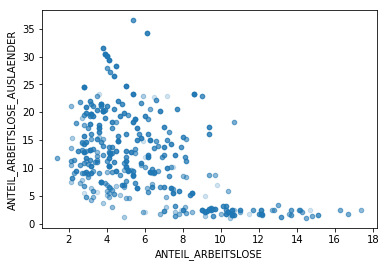

In [207]:
df_labeled.plot(kind = "scatter", x="ANTEIL_ARBEITSLOSE", y="ANTEIL_ARBEITSLOSE_AUSLAENDER", alpha=0.2)

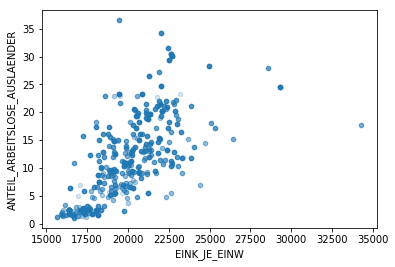

In [147]:
df_labeled.plot(kind = "scatter", y="ANTEIL_ARBEITSLOSE_AUSLAENDER", x="EINK_JE_EINW", alpha=0.2)

,BEV_INSGESAMT,osm_nodes_counter,ANTEIL_SIEDLUNG_VERKEHR,BEV_JE_QM,HH_1_4,ANTEIL_ARBEITSLOSE,EINK_JE_EINW,revenue_avg1
BEV_INSGESAMT,1.00,0.76,0.43,0.54,0.99,-0.04,0.13,0.78
osm_nodes_counter,0.76,1.00,0.29,0.39,0.75,-0.05,0.13,0.85
ANTEIL_SIEDLUNG_VERKEHR,0.43,0.29,1.00,0.51,0.45,-0.28,0.45,0.36
BEV_JE_QM,0.54,0.39,0.51,1.00,0.52,-0.16,0.31,0.52
HH_1_4,0.99,0.75,0.45,0.52,1.00,-0.08,0.16,0.75
ANTEIL_ARBEITSLOSE,-0.04,-0.05,-0.28,-0.16,-0.08,1.00,-0.74,-0.09
EINK_JE_EINW,0.13,0.13,0.45,0.31,0.16,-0.74,1.00,0.28
revenue_avg1,0.78,0.85,0.36,0.52,0.75,-0.09,0.28,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2453B9278>,
      dtype=object)

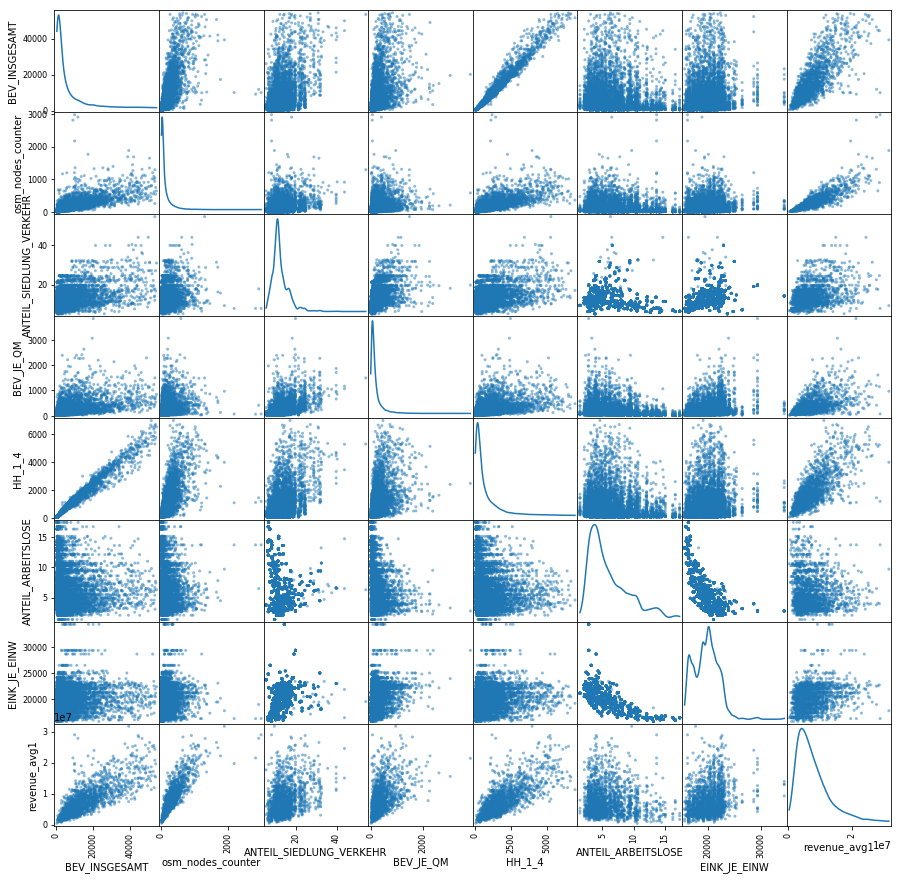

In [76]:
collist = ["BEV_INSGESAMT", "osm_nodes_counter", "ANTEIL_SIEDLUNG_VERKEHR", "BEV_JE_QM", "HH_1_4", 
           "ANTEIL_ARBEITSLOSE", "EINK_JE_EINW", "revenue_avg1"]



display(df_extract[collist].corr(method="pearson"))

pd.plotting.scatter_matrix(df_extract[collist], figsize=(15, 15), diagonal='kde')


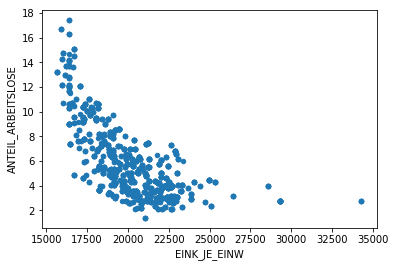

In [79]:
df_labeled.plot(kind = "scatter", x="EINK_JE_EINW", y="ANTEIL_ARBEITSLOSE")

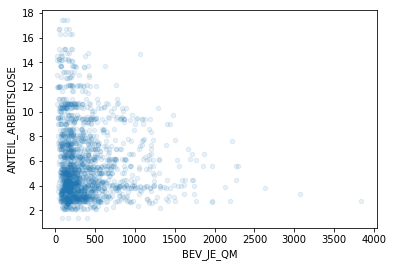

In [109]:
df_labeled.plot(kind = "scatter", x="BEV_JE_QM", y="ANTEIL_ARBEITSLOSE", alpha=0.1)

In [110]:
df_extract[["BEV_INSGESAMT", "ANTEIL_ARBEITSLOSE"]].corr()

,BEV_INSGESAMT,ANTEIL_ARBEITSLOSE
BEV_INSGESAMT,1.00,-0.04
ANTEIL_ARBEITSLOSE,-0.04,1.00
